# **Maharashtra Census Data Exploratory Analysis**





**Importing all the essential Library for Analysis**

In [ ]:
import os.path
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

**Importing Dataset for Analysis**

In [ ]:
data_path = "MHA Population Report.csv"
if os.path.exists(data_path):
  df = pd.read_csv(data_path)
else:
  print("File Not Found")


**Showing Top rows of dataset**

In [ ]:
df.head()

,Census Year,District,Taluka,Town/Village,No. of households,Total population,Total male population,Total female population,Total 0 to 6 year children,Male 0 to 6 year children,...,Female literates,Total iliterates,Male iliterates,Female iliterates,Total main workers,Male main workers,Female main workers,Total non workers,Male non workers,Female non workers
0,2011,AHMADNAGAR,AKOLA,ABIT KHIND,201,732,359,373,73,36,...,175,313.0,115.0,198.0,424,204,220,285,143,142
1,2011,AHMADNAGAR,AKOLA,AGAR,37,247,162,85,27,15,...,53,58.0,26.0,32.0,106,58,48,140,103,37
2,2011,AHMADNAGAR,AKOLA,AGASTINAGAR,357,1536,799,737,178,97,...,467,462.0,192.0,270.0,787,439,348,681,332,349
3,2011,AHMADNAGAR,AKOLA,AKOLA,3861,18278,9381,8897,2066,1101,...,6437,4400.0,1940.0,2460.0,6688,4599,2089,10937,4422,6515
4,2011,AHMADNAGAR,AKOLA,AMBAD,529,2590,1352,1238,333,189,...,743,845.0,350.0,495.0,1491,763,728,1083,580,503


**Display Basic Information of Dataset**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132315 entries, 0 to 132314
Data columns (total 29 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Census Year                  132315 non-null  int64  
 1   District                     132315 non-null  object 
 2   Taluka                       132299 non-null  object 
 3   Town/Village                 131279 non-null  object 
 4   No. of households            132315 non-null  int64  
 5   Total population             132315 non-null  int64  
 6   Total male population        132315 non-null  int64  
 7   Total female population      132315 non-null  int64  
 8   Total 0 to 6 year children   132315 non-null  int64  
 9   Male 0 to 6 year children    132315 non-null  int64  
 10  Female 0 to 6 year children  132315 non-null  int64  
 11  Total SC population          132315 non-null  int64  
 12  Male SC population           132315 non-null  int64  
 13 

# 2 . Data Cleaning

2.1 Counting Missing Values in Each Columns

In [ ]:
df.isnull().sum()

Census Year                        0
District                           0
Taluka                            16
Town/Village                    1036
No. of households                  0
Total population                   0
Total male population              0
Total female population            0
Total 0 to 6 year children         0
Male 0 to 6 year children          0
Female 0 to 6 year children        0
Total SC population                0
Male SC population                 0
Female SC population               0
Total ST population                0
Male ST population                 0
Female ST population               0
Total literates                    0
Male literates                     0
Female literates                   0
Total iliterates               49347
Male iliterates                49347
Female iliterates              49347
Total main workers                 0
Male main workers                  0
Female main workers                0
Total non workers                  0
M

Observation: Columns Containing Null Values are Total iliterates, iliterates and Female iliterates these null values can be fixed.

**2.2 Columns Containing Null Values**

**2.3 From Above Code We can Conclude that Male illterates populations can be calculated by Total male population and Male literates**

In [ ]:
df['Male iliterates'] = df['Total male population'] - df['Male literates']
df['Male iliterates'].isnull().sum()

0

**2.4 Following Similar Approach for Female iliterates**

In [ ]:
df['Female iliterates'] =df['Total female population'] - df['Female literates']
df['Female iliterates'].isnull().sum()

0

**2.5 Calculating Total iliterate population**

In [ ]:
df['Total iliterates'] = df['Male iliterates'] + df['Female iliterates']
df['Total iliterates'].isnull().sum()

0

**2.6 Dropping all the duplicate rows in dataset**

In [ ]:
df.drop_duplicates()
df.shape

(132315, 29)

**2.7 Replacing all the Null Values to Zero**

In [ ]:
df.fillna(0, inplace=True)

#3 Exploratory Data Analysis

**3.1 Summarize the main Characterstics of the data**

In [ ]:
df.describe()

,Census Year,No. of households,Total population,Total male population,Total female population,Total 0 to 6 year children,Male 0 to 6 year children,Female 0 to 6 year children,Total SC population,Male SC population,...,Female literates,Total iliterates,Male iliterates,Female iliterates,Total main workers,Male main workers,Female main workers,Total non workers,Male non workers,Female non workers
count,132315.000000,1.323150e+05,1.323150e+05,1.323150e+05,1.323150e+05,1.323150e+05,132315.000000,132315.000000,132315.000000,132315.000000,...,1.323150e+05,1.323150e+05,1.323150e+05,1.323150e+05,1.323150e+05,1.323150e+05,132315.000000,1.323150e+05,1.323150e+05,1.323150e+05
mean,2000.406492,8.222010e+02,4.144163e+03,2.156298e+03,1.987865e+03,6.286691e+02,326.209719,302.459358,493.478041,253.877111,...,1.125535e+03,1.467068e+03,6.047389e+02,8.623294e+02,1.405156e+03,1.047037e+03,358.118626,2.586600e+03,1.044369e+03,1.542231e+03
std,8.264585,1.213648e+04,5.730412e+04,3.084739e+04,2.648095e+04,7.273950e+03,3782.663981,3491.664407,5835.730419,3014.781904,...,1.845541e+04,1.482293e+04,6.500574e+03,8.332743e+03,1.954535e+04,1.627014e+04,3359.076581,3.434923e+04,1.242163e+04,2.290367e+04
min,1991.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,1991.000000,1.020000e+02,4.930000e+02,2.460000e+02,2.450000e+02,7.300000e+01,37.000000,35.000000,4.000000,2.000000,...,8.800000e+01,2.050000e+02,7.800000e+01,1.250000e+02,1.990000e+02,1.190000e+02,70.000000,2.220000e+02,1.060000e+02,1.130000e+02
50%,2001.000000,1.930000e+02,9.460000e+02,4.780000e+02,4.680000e+02,1.440000e+02,74.000000,69.000000,73.000000,37.000000,...,2.020000e+02,4.040000e+02,1.570000e+02,2.460000e+02,4.090000e+02,2.390000e+02,166.000000,4.470000e+02,2.120000e+02,2.320000e+02
75%,2011.000000,3.610000e+02,1.785000e+03,9.090000e+02,8.770000e+02,2.730000e+02,142.000000,131.000000,234.000000,119.000000,...,4.290000e+02,7.740000e+02,3.070000e+02,4.670000e+02,7.860000e+02,4.630000e+02,324.000000,8.770000e+02,4.120000e+02,4.680000e+02
max,2011.000000,2.105604e+06,9.925891e+06,5.460145e+06,4.465746e+06,1.340673e+06,698357.000000,642316.000000,646914.000000,344085.000000,...,3.352456e+06,2.811580e+06,1.247676e+06,1.563904e+06,3.515922e+06,2.966082e+06,704441.000000,5.621941e+06,2.088585e+06,3.973736e+06


**3.2 Population Destribution**

3.2.1 Population Distribution by District

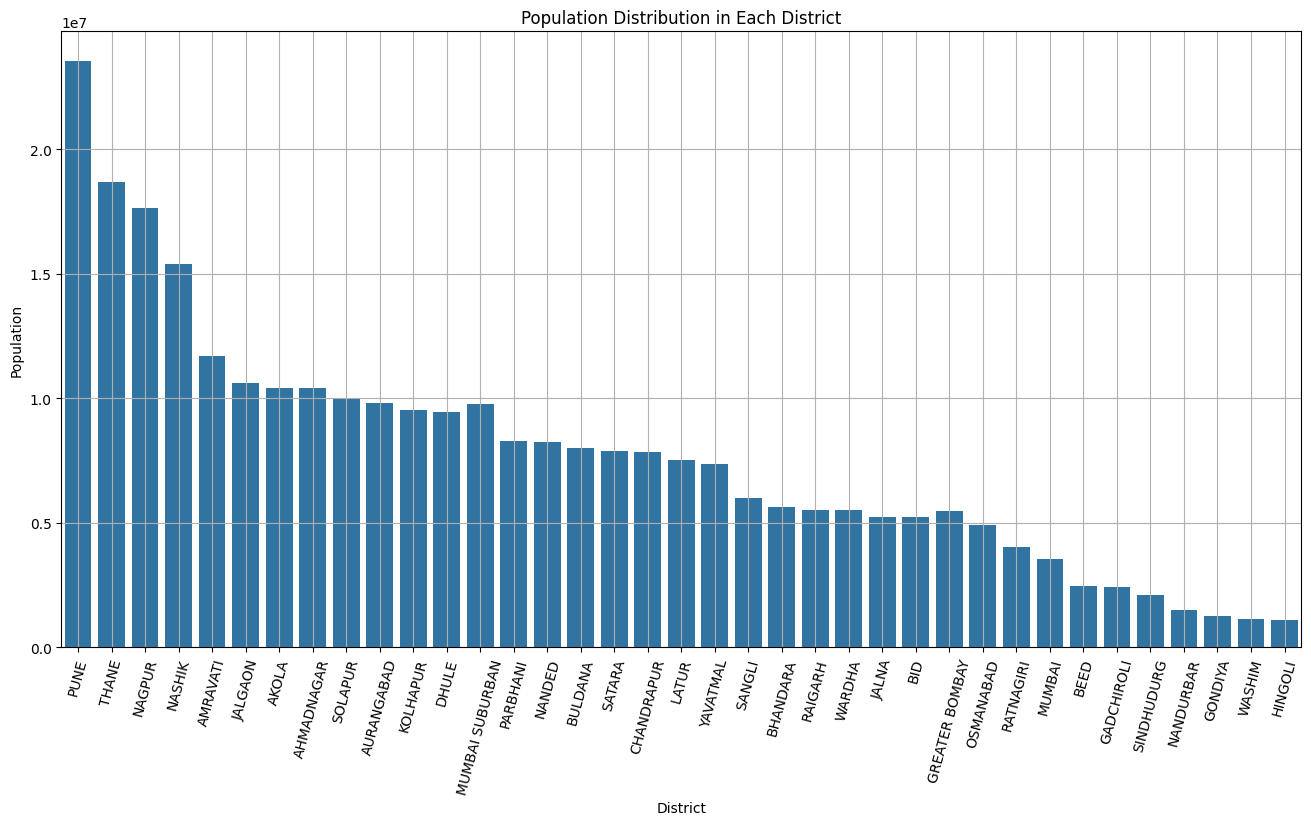

In [ ]:
#Filtering Data for Analysis
grouped_population_data = df.groupby('District')[['Total population','Total male population' , 'Total female population', ]].sum().sort_values(by='Total population',ascending=False)
plt.figure(figsize=(16,8))
sns.barplot(x='District',y='Total male population',data=grouped_population_data)
plt.grid()
plt.xticks(rotation=75)
plt.title('Population Distribution in Each District')
plt.xlabel('District')
plt.ylabel('Population')
plt.show()


**3.2.2 Gender Distribution**

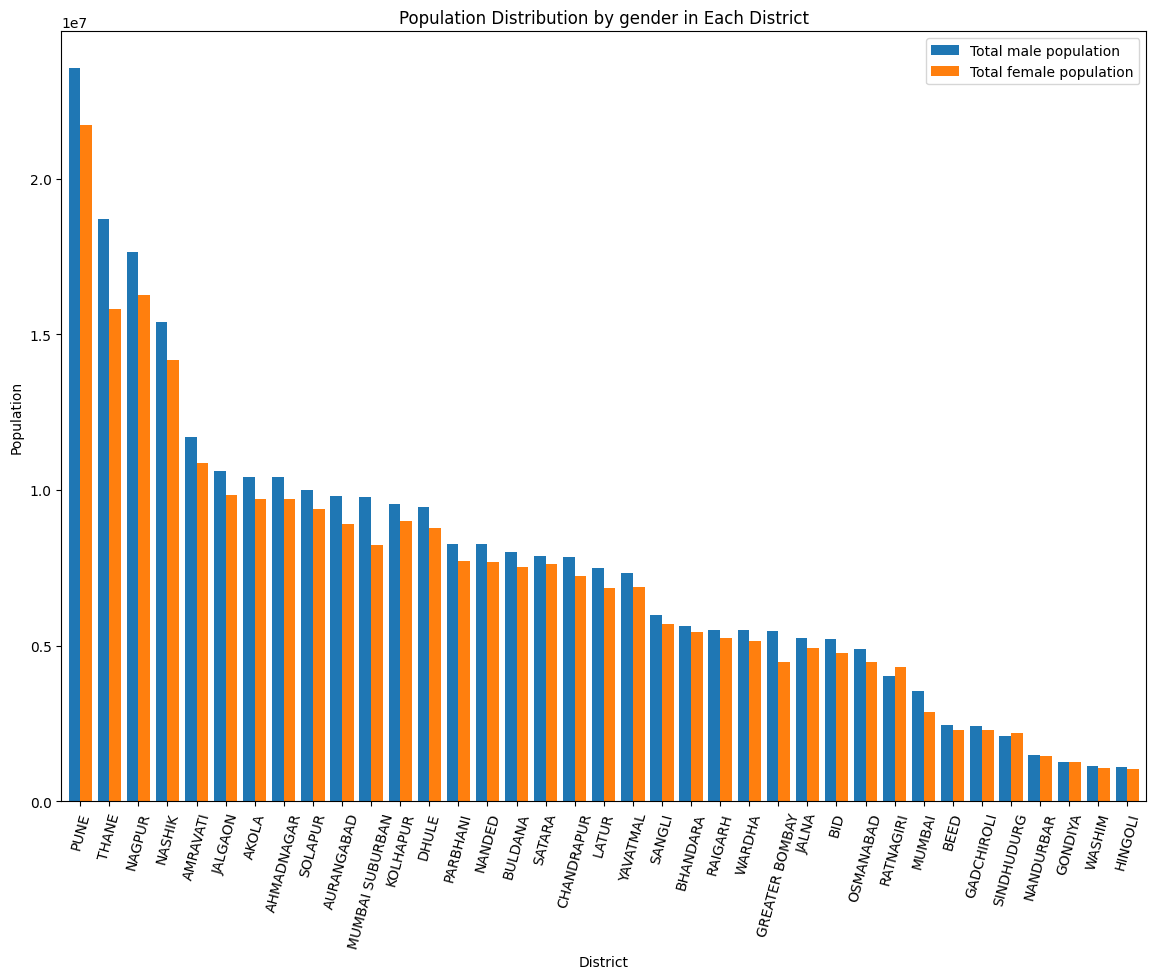

In [ ]:
gender_population_data = df.groupby('District')[['Total male population','Total female population']].sum().sort_values(by='Total male population',ascending=False)
gender_population_data.plot(kind= 'bar',figsize=(14,10),width = 0.8)
plt.xticks(rotation=75)
plt.title('Population Distribution by gender in Each District')
plt.xlabel('District')
plt.ylabel('Population')
plt.show()

**3.3 Gender Ratio Distribution**

**Overall Gender Ratio get decreased in Maharastra from year 1991 to 2011**

In [ ]:
for index, row in df.iterrows():
    if (row['Total male population'] ==0):
        gender_population_data.loc[index, 'Gender Ratio'] = 0
    else:
      gender_population_data.loc[index, 'Gender Ratio'] = (row['Total female population']/row['Total male population'])*1000



In [1]:
grouped_gender_ratio_data =  gender_population_data.groupby(df['Census Year'])['Gender Ratio'].mean()


<Axes: xlabel='Census Year'>

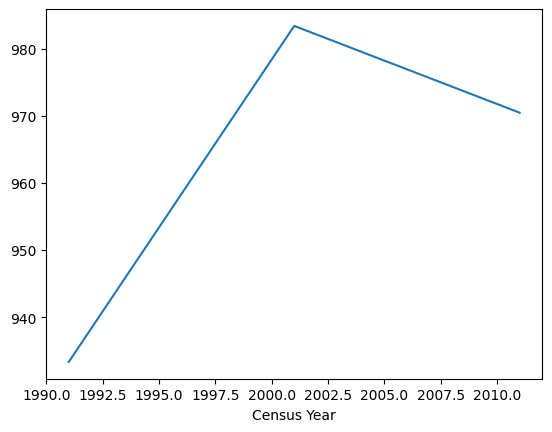

In [ ]:
grouped_gender_ratio_data.plot(kind = 'line')

**3.4 Literacy Ratio**

In [ ]:
#Calculating Litracy Rate
gender_litracy_data = pd.DataFrame(df[['Census Year','District', 'Male literates','Female literates','Total male population','Total female population']])
gender_litracy_data['female_literate_population %']  = ((df['Female literates']/df['Total female population'])*100).round(2)
gender_litracy_data['male_literate_population %']  = ((df['Male literates']/df['Total male population'])*100).round(2)
gender_litracy_data['total_literate_population %']  =((df['Total literates']/df['Total population'])*100).round(2)
district_litracy_data = gender_litracy_data.groupby('District')['total_literate_population %'].mean().sort_values(ascending=False).head(10)



**3.5 District with heighest Litracy rate**

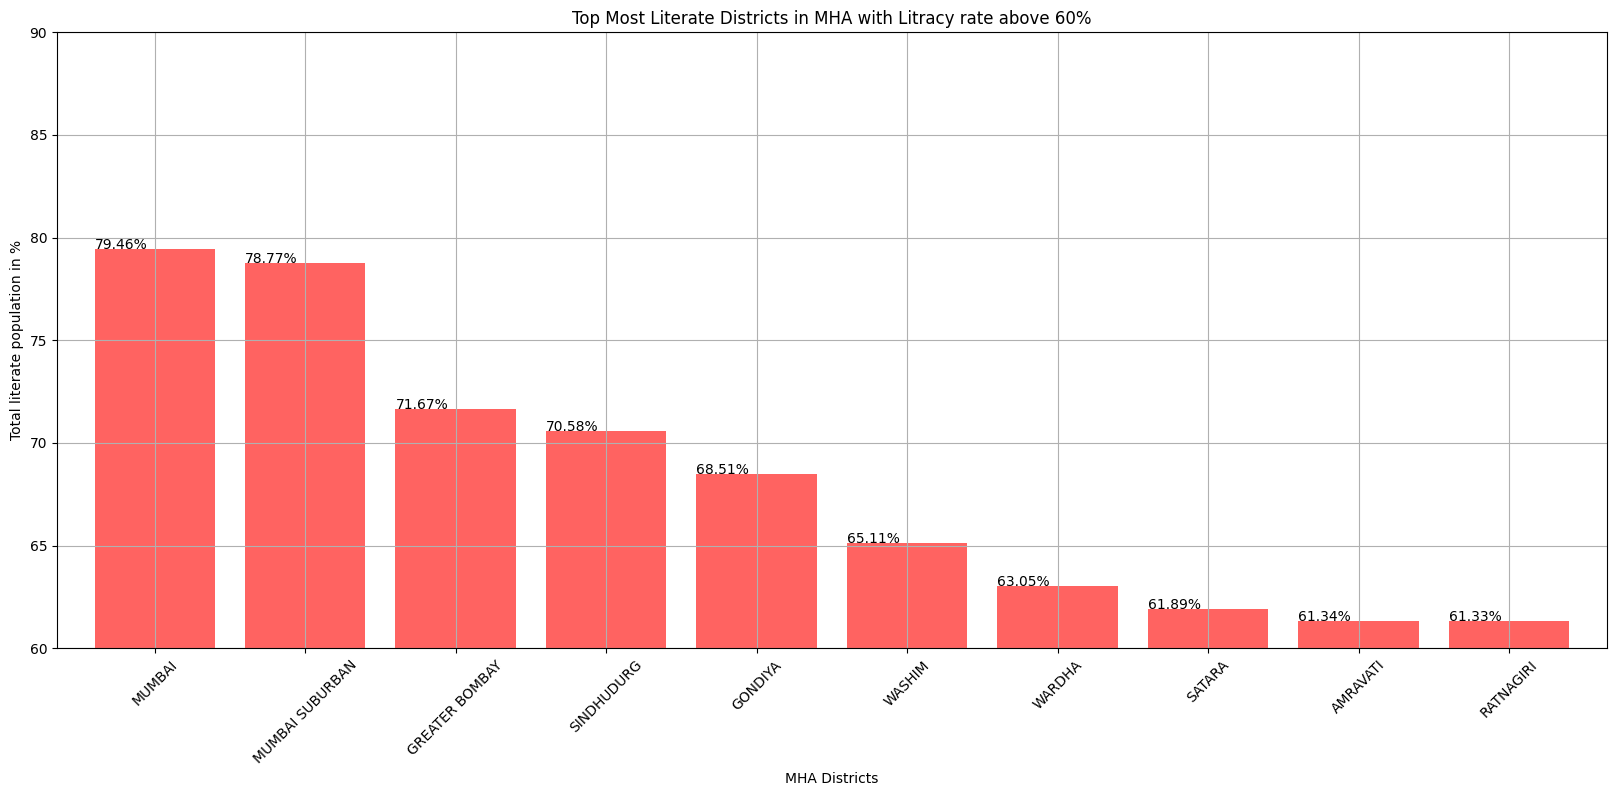

In [ ]:
district_litracy_bar = district_litracy_data.plot(kind='bar',figsize=(20,8),width = 0.8 , color = '#ff6361')
plt.xticks(rotation=45)
plt.grid(True)
plt.title('Top Most Literate Districts in MHA with Litracy rate above 60%')
plt.xlabel('MHA Districts')
plt.ylabel('Total literate population in %')
plt.ylim(60,90)
for bar in district_litracy_bar.patches:
    district_litracy_bar.annotate(str(round(bar.get_height(),2))+'%', (bar.get_x() , bar.get_height()))
plt.show()

**3.6 Male and Female Litracy Comparison**

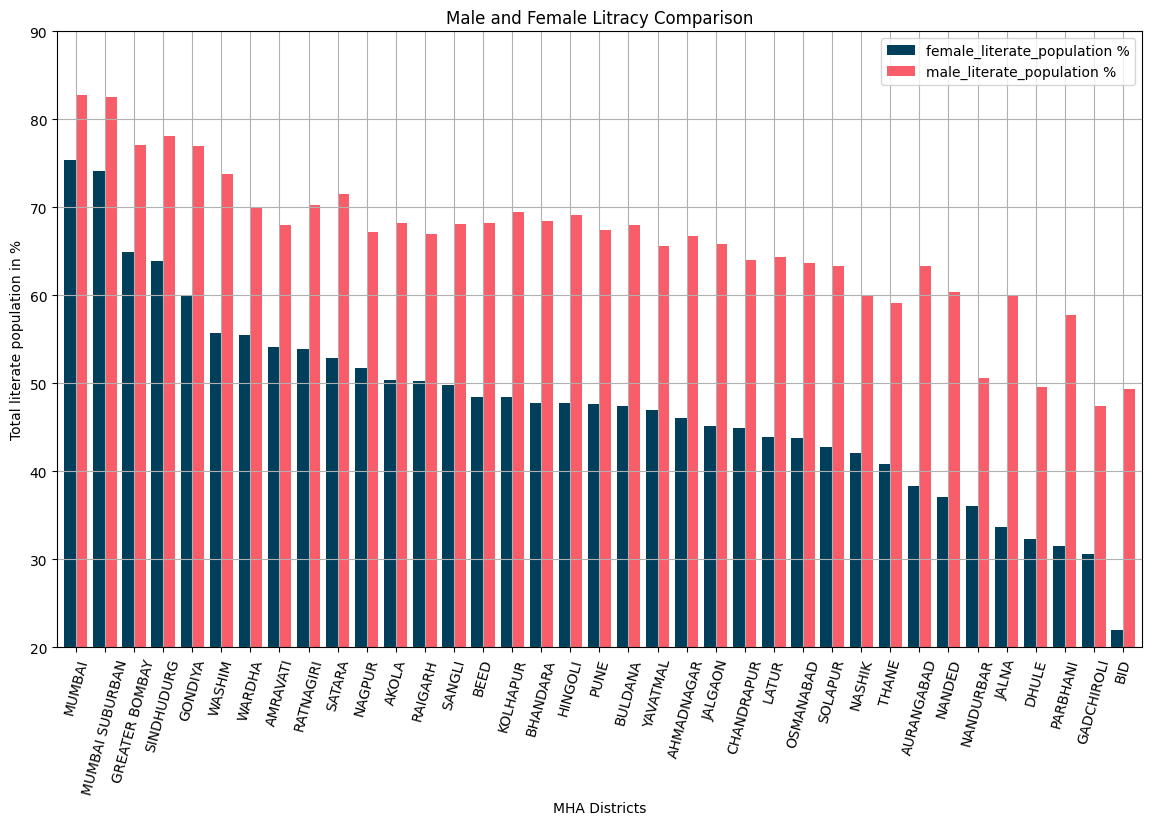

In [ ]:
female_litracy_data = gender_litracy_data.groupby('District')[['female_literate_population %','male_literate_population %']].mean().sort_values(by='female_literate_population %',ascending=False)
female_litracy_data.plot(kind='bar',figsize=(14,8),width = 0.8,color =['#003f5c','#f95d6a'])
plt.title('Male and Female Litracy Comparison')
plt.grid(True)
plt.xticks(rotation=75)
plt.xlabel('MHA Districts')
plt.ylabel('Total literate population in %')
plt.ylim(20,90)
plt.show()

**3.7 Overall Male and  Female Literacy Rate Over the Census Year**

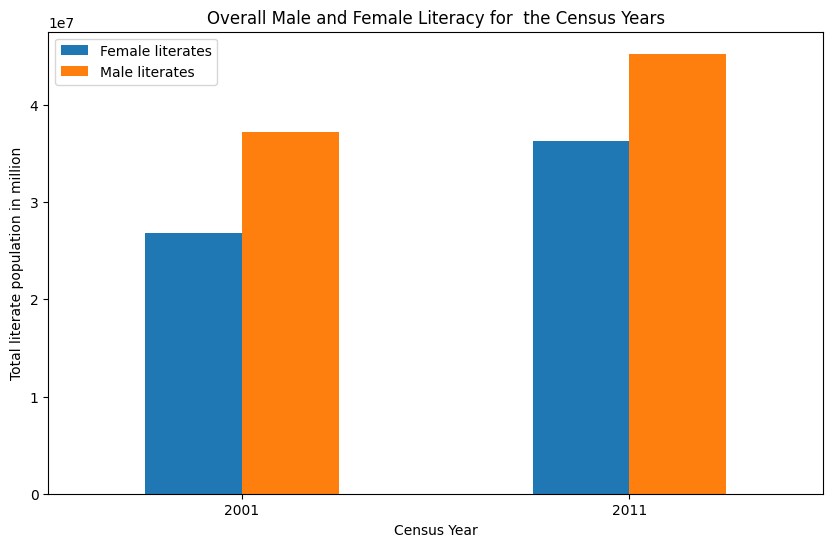

In [ ]:
filtered_df = df[df['Census Year'].isin([2001, 2011])]
Overall_litracy_data_census = filtered_df.groupby('Census Year')[['Female literates','Male literates']].sum()
bar_plot_female_litracy = Overall_litracy_data_census.plot(kind='bar',figsize=(10,6),width = 0.5)
plt.title('Overall Male and Female Literacy for  the Census Years')
plt.xticks(rotation=360)
plt.xlabel('Census Year')
plt.ylabel('Total literate population in million')
plt.show()

**3.8 Corelation betwen litracy and population**

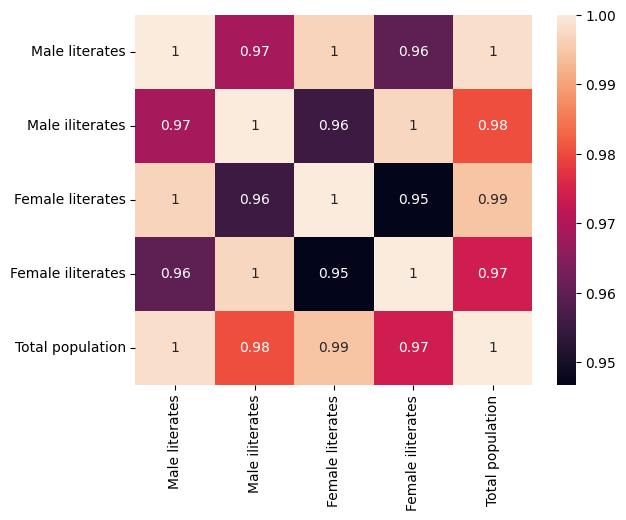

In [ ]:
pair_wise_correlation = df[['Male literates','Male iliterates','Female literates','Female iliterates','Total population']].corr()
sns.heatmap(pair_wise_correlation,annot=True)
plt.show()

**3.9 Male and Female Population non working population**

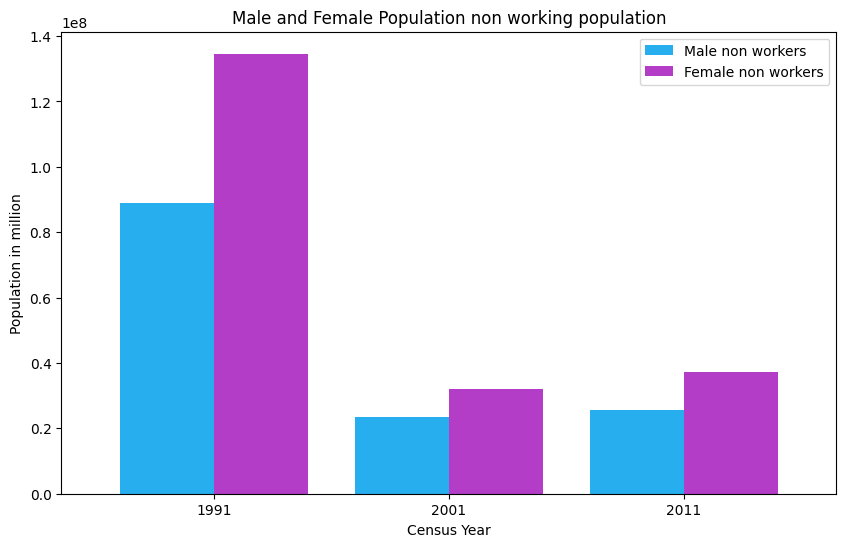

In [ ]:
df.groupby('Census Year')[['Male non workers','Female non workers']].sum().plot(kind='bar',figsize=(10,6),width = 0.8 ,color=["#27aeef", "#b33dc6"])
plt.title('Male and Female Population non working population')
plt.xticks(rotation=360)
plt.xlabel('Census Year')
plt.ylabel('Population in million')
plt.show()